In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('waterPotability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
col=['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for i in col:
    df[i]=df[i].replace(0,np.NAN)
    mean=df[i].mean(skipna=True)
    df[i] = df[i].replace(np.NAN,mean)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.083338,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
# estimate the bias and variance for a regression model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.evaluate import bias_variance_decomp
# separate into inputs and outputs
data = df.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [5]:
X_test
y_train

array([0., 1., 1., ..., 1., 0., 0.])

In [6]:
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=100, random_seed=1)

In [7]:
# summarize results
print('Bias: %f' % bias)
print('Variance: %f' % var)

Bias: 0.240163
Variance: 0.001437


In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [9]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k=8)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.526213
Feature 1: 4.602876
Feature 2: 1.947322
Feature 3: 0.051360
Feature 4: 1.430491
Feature 5: 0.296669
Feature 6: 0.481509
Feature 7: 0.000025
Feature 8: 2.593094


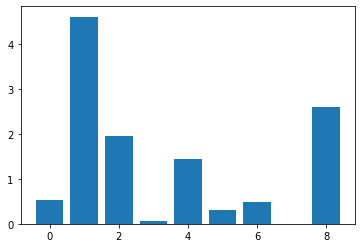

In [10]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [11]:
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train_fs, y_train, X_test_fs, y_test, loss='mse', num_rounds=100, random_seed=1)

In [12]:
# summarize results
print('Bias: %f' % bias)
print('Variance: %f' % var)

Bias: 0.240153
Variance: 0.001307


In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

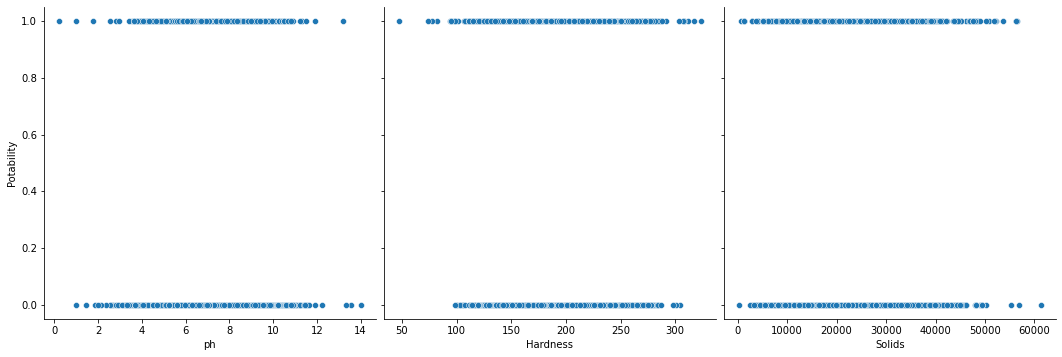

In [19]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['ph','Hardness','Solids'], 
             y_vars='Potability', height=5, aspect=1, kind='scatter')
plt.show()

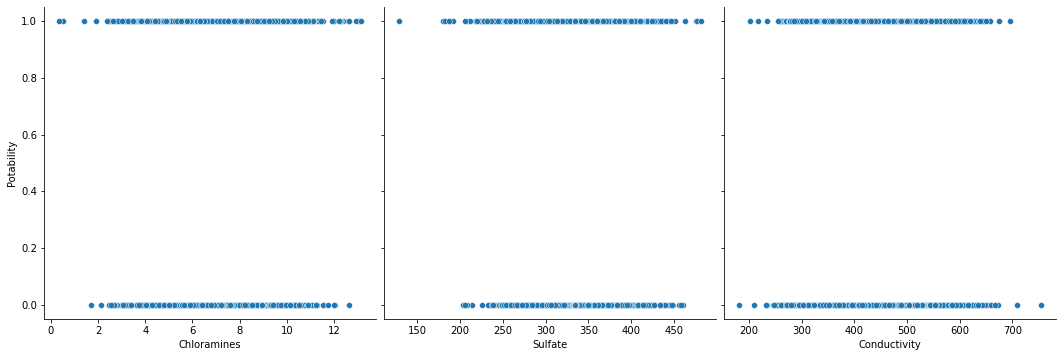

In [15]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['Chloramines','Sulfate','Conductivity'], 
             y_vars='Potability', height=5, aspect=1, kind='scatter')
plt.show()

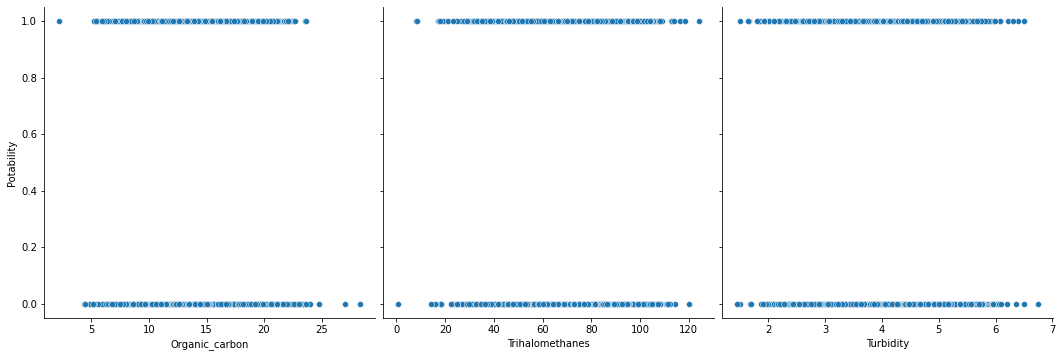

In [16]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['Organic_carbon','Trihalomethanes','Turbidity'], 
             y_vars='Potability', height=5, aspect=1, kind='scatter')
plt.show()